In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import preprocessing, datasets, svm, metrics
import tensorflow.keras as tk
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import os
from skimage.transform import resize
import matplotlib.image as mpimg

In [12]:
'''Creates a csv file for the data with individual features for each RGB
Value. This method is used for knn and svm where tuples are not accepted
as possible inputs.

Parameters:
dimension - an integer representing desired of the image:
            dimension x dimension
Returns:
None

'''
def getDataFrame(dimension):
    cwd = os.getcwd()
    metadata = pd.read_csv(cwd+'/data/HAM10000_metadata.csv')
    directory1 = cwd+'/data/HAM10000_images_part_1/'
    directory2 = cwd+'/data/HAM10000_images_part_2/'
    c_type = {"akiec":0,
         "bcc":1,
         "bkl":2,
         "df":3,
         "mel":4,
         "nv":5,
         "vasc":6}
    i=0
    y=[]
    x = np.empty((10015, dimension*dimension*3))
    for imagename in os.listdir(directory1):
        x[i] = np.ndarray.flatten(resize(mpimg.imread(directory1+imagename), output_shape=(dimension,dimension,3), preserve_range = True,anti_aliasing=True).astype(int))
        y.append(c_type[metadata.loc[metadata['image_id'] == imagename[0:len(imagename)-4]]['dx'].array[0]])
        i+=1
    for imagename in os.listdir(directory2):
        x[i] = np.ndarray.flatten(resize(mpimg.imread(directory2+imagename), output_shape=(dimension,dimension,3), preserve_range = True,anti_aliasing=True).astype(int))
        y.append(c_type[metadata.loc[metadata['image_id'] == imagename[0:len(imagename)-4]]['dx'].array[0]])
        i+=1
    df = pd.DataFrame(x)
    df["label"] = y
    name = "hmnist_"+str(dimension)+'_'+str(dimension)+"_RGB.csv"
    df.to_csv(name, index=False)

In [13]:
getDataFrame(28)

In [2]:
#read in data
impot_data = pd.read_csv('hmnist_28_28_RGB.csv')

#shuffle data
temp = shuffle(impot_data)

#store values in the "cancer" column
print(temp)
target = temp["label"]
# target = temp["label"]

x_undata= temp.drop(columns=["label"])

scaler = MinMaxScaler()
result = scaler.fit(x_undata)

#normalized data is a 2d array
x_data = scaler.transform(x_undata)

#split data
X_train, x_test, Y_train, y_test = train_test_split(x_data, target, test_size = 0.20, random_state= 42)
x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train, test_size= 1/8, random_state= 42)

      pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
3484        231        162        172        231        161        171   
781         118         84        140         82         66        156   
2083        148         92         77        157        106         99   
9706        151        120        114        156        125        119   
8427        170        148        150        177        153        157   
...         ...        ...        ...        ...        ...        ...   
833         210        164        177        215        170        185   
543          90         68         83        117         90        102   
6978        165        133        153        167        134        156   
2290        173        134        141        179        142        145   
2840        191        158        173        195        168        186   

      pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
3484        236        163      

In [3]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.00393701, 0.00401606,
        0.00393701],
       [0.87843137, 0.57317073, 0.54901961, ..., 0.7992126 , 0.5502008 ,
        0.44094488],
       [0.96078431, 0.66260163, 0.69019608, ..., 0.87007874, 0.6184739 ,
        0.5984252 ],
       ...,
       [0.78431373, 0.67479675, 0.7372549 , ..., 0.80708661, 0.69879518,
        0.76377953],
       [0.78039216, 0.48373984, 0.58823529, ..., 0.67322835, 0.41365462,
        0.45669291],
       [0.87843137, 0.55284553, 0.53333333, ..., 0.77559055, 0.45783133,
        0.41732283]])

## SVM Model

In [4]:
clf = svm.SVC(kernel = 'poly',degree = 2, gamma = 0.07)
clf.fit(x_train, y_train)

SVC(degree=2, gamma=0.07, kernel='poly')

In [5]:
predicted = clf.predict(x_test)
predicted.size

2003

In [6]:
y_test
ya = np.array(y_test)
ya.size
print(ya)
print(predicted)

[2 4 6 ... 4 0 4]
[2 4 4 ... 4 0 4]


In [7]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(ya, predicted)}\n"
)
count = 0
for i in range(0,ya.size):
    if (ya[i] == predicted[i]):
        count += 1
accu = count / ya.size
print(accu)

Classification report for classifier SVC(degree=2, gamma=0.07, kernel='poly'):
              precision    recall  f1-score   support

           0       0.32      0.36      0.34        64
           1       0.44      0.47      0.45       106
           2       0.35      0.40      0.37       218
           3       0.00      0.00      0.00        24
           4       0.84      0.85      0.85      1345
           5       0.36      0.33      0.35        27
           6       0.40      0.28      0.33       219

    accuracy                           0.69      2003
   macro avg       0.39      0.38      0.38      2003
weighted avg       0.68      0.69      0.68      2003


0.6869695456814778


Confusion matrix:
[[  23   10   15    0    9    1    6]
 [  13   50   11    4   23    4    1]
 [   9   13   87    3   83    4   19]
 [   7    8    5    0    4    0    0]
 [  12   23   86   12 1146    2   64]
 [   3    3    1    1    9    9    1]
 [   6    7   45    4   91    5   61]]


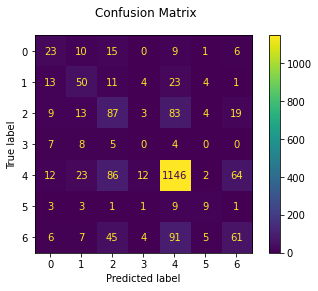

In [8]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [9]:
#hyperparameter tuning
parameters = {'kernel':('linear','poly'), 'C':[1,5,9]}
svc = svm.SVC()
gs = GridSearchCV(svc, parameters)
gs.fit(x_val, y_val)
print(gs.cv_results_["params"])
print(gs.cv_results_["rank_test_score"])
print(gs.cv_results_["mean_test_score"])

[{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'poly'}, {'C': 5, 'kernel': 'linear'}, {'C': 5, 'kernel': 'poly'}, {'C': 9, 'kernel': 'linear'}, {'C': 9, 'kernel': 'poly'}]
[1 2 5 2 6 2]
[0.66170647 0.66071642 0.64872637 0.66071642 0.64673632 0.66071642]


In [10]:
#second tuning
para2 = {'kernel':['poly'], 'degree': [2,3,4],'gamma': [0.01,0.05,0.1]}
svc = svm.SVC()
gs = GridSearchCV(svc, para2)
gs.fit(x_val, y_val)
print(gs.cv_results_["params"])
print(gs.cv_results_["rank_test_score"])
print(gs.cv_results_["mean_test_score"])

[{'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}, {'degree': 2, 'gamma': 0.05, 'kernel': 'poly'}, {'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}, {'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}, {'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}, {'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}, {'degree': 4, 'gamma': 0.01, 'kernel': 'poly'}, {'degree': 4, 'gamma': 0.05, 'kernel': 'poly'}, {'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}]
[1 3 3 2 5 5 7 7 7]
[0.70259701 0.66169652 0.66169652 0.66769154 0.66071642 0.66071642
 0.65971642 0.65971642 0.65971642]


In [11]:
para3 = {'kernel':['poly'], 'degree': [2],'gamma': [0.001,0.003,0.005,0.006,0.007,0.008,0.009]}
svc = svm.SVC()
gs = GridSearchCV(svc, para3)
gs.fit(x_val, y_val)
print(gs.cv_results_["params"])
print(gs.cv_results_["rank_test_score"])
print(gs.cv_results_["mean_test_score"])

[{'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}, {'degree': 2, 'gamma': 0.003, 'kernel': 'poly'}, {'degree': 2, 'gamma': 0.005, 'kernel': 'poly'}, {'degree': 2, 'gamma': 0.006, 'kernel': 'poly'}, {'degree': 2, 'gamma': 0.007, 'kernel': 'poly'}, {'degree': 2, 'gamma': 0.008, 'kernel': 'poly'}, {'degree': 2, 'gamma': 0.009, 'kernel': 'poly'}]
[6 6 4 5 2 3 1]
[0.68163682 0.68163682 0.68363682 0.68264179 0.68862687 0.68763682
 0.69960697]


In [12]:
#k-fold validation
K_fold = svm.SVC(kernel = 'poly',degree = 2, gamma = 0.07)
validation_result = cross_val_score(K_fold, x_val, y_val, cv = 5)
print(validation_result.mean())

0.6616965174129354
